# Improved Flight Price Prediction - Feature Engineering

## by <u>WRAPPER METHOD using</u> ~ <i><u>Linear Regression Model</i>

#### Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Reading Normalized Dataset

In [2]:
# reading Normalized dataset into dataset

dataset = pd.read_excel('Normalized_Flight_data.xlsx')
dataset.head()

,Date,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration
0,2019-03-01,0.090909,0.0,1.0,0.25,0.888889,0.197754,0.023622,0.819615
1,2019-03-01,0.909091,0.0,1.0,1.00,0.888889,0.254151,0.141732,0.054291
2,2019-03-01,0.363636,0.0,1.0,0.00,0.888889,0.323216,0.039370,0.150613
3,2019-03-01,0.090909,0.0,1.0,0.00,0.888889,0.281893,0.039370,0.113835
4,2019-03-01,0.272727,0.0,1.0,1.00,0.888889,0.130863,0.141732,0.057793


In [3]:
dataset.Timestamp = pd.to_datetime(dataset.Date,format='%d-%m-%Y') 
dataset.index = dataset.Timestamp 

# dropping Date_of_Journey column

dataset.drop(columns=['Date'], inplace=True)
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration
Date,,,,,,,,
2019-03-01,0.090909,0.0,1.0,0.25,0.888889,0.197754,0.023622,0.819615
2019-03-01,0.909091,0.0,1.0,1.00,0.888889,0.254151,0.141732,0.054291
2019-03-01,0.363636,0.0,1.0,0.00,0.888889,0.323216,0.039370,0.150613
2019-03-01,0.090909,0.0,1.0,0.00,0.888889,0.281893,0.039370,0.113835
2019-03-01,0.272727,0.0,1.0,1.00,0.888889,0.130863,0.141732,0.057793


#### Reading Actual Pre-Processed Dataset

In [4]:
# reading Actual Pre-Processed dataset into dataset

actual_dataset = pd.read_excel('Processed_Flight_data.xlsx')
actual_dataset.head()

,Date,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route,Duration
0,2019-03-01,1,0,5,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,1,8,17135,3,2345
1,2019-03-01,10,0,5,BLR → DEL,07:00,09:40,2h 40m,4,8,21520,18,160
2,2019-03-01,4,0,5,BLR → BOM → DEL,08:55,16:10,7h 15m,0,8,26890,5,435
3,2019-03-01,1,0,5,BLR → BOM → DEL,06:45,12:15,5h 30m,0,8,23677,5,330
4,2019-03-01,3,0,5,BLR → DEL,22:20,01:10 02 Mar,2h 50m,4,8,11934,18,170


#### Correlation Matrix

In [5]:
# By Default Pearson's Correlation

corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration
Name,1,-0.013397,0.0184457,0.0359727,-0.0607477,-0.0395648,0.0252143,-0.159651
From,-0.013397,1,-0.592576,-0.225605,-0.0221088,0.0159992,0.403412,0.161886
To,0.0184457,-0.592576,1,0.337872,0.0268207,-0.0711225,-0.461176,-0.257352
Stops,0.0359727,-0.225605,0.337872,1,0.164054,-0.571221,-0.437749,-0.602282
Extra Services,-0.0607477,-0.0221088,0.0268207,0.164054,1,-0.0654625,0.0351522,-0.16787
Price,-0.0395648,0.0159992,-0.0711225,-0.571221,-0.0654625,1,0.164149,0.50648
Encoded Route,0.0252143,0.403412,-0.461176,-0.437749,0.0351522,0.164149,1,0.288773
Duration,-0.159651,0.161886,-0.257352,-0.602282,-0.16787,0.50648,0.288773,1


In [6]:
# Shape of Dataset

dataset.shape

(10682, 8)

#### List of Features

In [7]:
dataset.columns

Index(['Name', 'From', 'To', 'Stops', 'Extra Services', 'Price',
       'Encoded Route', 'Duration'],
      dtype='object')

#### Dataset Descripton

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10682 entries, 2019-03-01 to 2019-06-09
Data columns (total 8 columns):
Name              10682 non-null float64
From              10682 non-null float64
To                10682 non-null float64
Stops             10682 non-null float64
Extra Services    10682 non-null float64
Price             10682 non-null float64
Encoded Route     10682 non-null float64
Duration          10682 non-null float64
dtypes: float64(8)
memory usage: 751.1 KB


In [9]:
dataset.describe()

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.360564,0.488064,0.287231,0.364562,0.821444,0.094250,0.589135,0.223475
std,0.213826,0.294319,0.294969,0.451580,0.134917,0.059310,0.289205,0.177874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.500000,0.000000,0.000000,0.888889,0.045246,0.377953,0.057793
50%,0.363636,0.500000,0.200000,0.000000,0.888889,0.085051,0.574803,0.180385
75%,0.363636,0.750000,0.400000,1.000000,0.888889,0.136509,0.818898,0.323993
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <u>Model Bulding - Linear Regression Model</u>

#### Separating <i>Regressand</i> and <i>Regressor<i>

In [10]:
# Dependent Variables

X = dataset[['Name', 'From', 'To', 'Stops', 'Extra Services', 'Encoded Route', 'Duration']].values

# Independent Variable

Y = dataset['Price'].values

#### Splitting Dataset into <i>Test</i> and <i>Train</i> Data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [12]:
X_test

array([[0.36363636, 0.5       , 0.2       , ..., 0.55555556, 0.81889764,
        0.58669002],
       [0.36363636, 0.5       , 0.2       , ..., 0.55555556, 0.81889764,
        0.49737303],
       [0.90909091, 0.75      , 0.        , ..., 0.88888889, 0.57480315,
        0.24343257],
       ...,
       [0.09090909, 1.        , 0.6       , ..., 0.88888889, 0.37795276,
        0.0262697 ],
       [0.09090909, 0.75      , 0.        , ..., 0.88888889, 0.56692913,
        0.40630473],
       [0.36363636, 0.        , 0.4       , ..., 0.55555556, 0.14173228,
        0.06129597]])

#### Fitting Data into Model

In [13]:
lm = LinearRegression()  
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Intercept

lm.intercept_

0.07713322624198472

In [15]:
# Gradient

lm.coef_

array([ 0.00503994, -0.01077318,  0.02064394, -0.06476545,  0.0308923 ,
       -0.01426282,  0.0934882 ])

#### Model Prediction

In [16]:
Y_predicted = lm.predict(X_test)

In [17]:
test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
test_dataframe.head()

,Original,Predicted
0,0.109359,0.138039
1,0.109359,0.129689
2,0.088112,0.115655
3,0.116844,0.134175
4,0.044616,0.051761


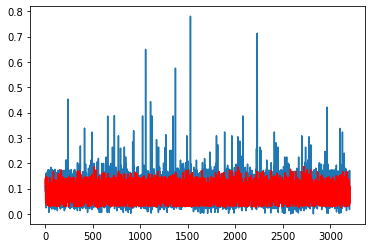

In [18]:
plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

#### Model Errors

In [19]:
# Mean Absolute Error

metrics.mean_absolute_error(Y_test, Y_predicted)

0.03316495644932593

In [20]:
# Mean Sqaured Error

metrics.mean_squared_error(Y_test, Y_predicted)

0.0023320420303492287

In [21]:
# Root Mean Squared Error

np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted))

0.04829122104843932

#### Accuracy of Model

In [22]:
accuracy = lm.score(X_test,Y_test)
print(accuracy*100,'%')

36.83283352220787 %


In [23]:
accuracy_dict = {'With all features':36.83283352220787}

## <u>Eliminating <i>'Duration'</i></u>

   Original  Predicted
0  0.109359   0.114877
1  0.109359   0.114877
2  0.088112   0.115658
3  0.116844   0.112266
4  0.044616   0.055691


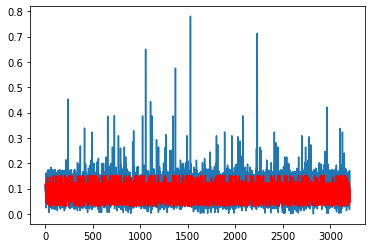


Mean Absolute Error :: 
 0.03497171307986403

Mean Squared Error :: 
 0.0025052847318960017

Root Mean Square Error :: 
 0.050052819420048675

Accuracy :: 
 32.14027205579695 %


In [24]:
# Dependent Variables

X = dataset[['Name', 'From', 'To', 'Stops', 'Extra Services', 'Encoded Route']].values

# Independent Variable

Y = dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['Without Duration'] = accuracy*100

## <u>Eliminating <i>'Encoded Route'</i></u>

   Original  Predicted
0  0.109359   0.140464
1  0.109359   0.132186
2  0.088112   0.112015
3  0.116844   0.131067
4  0.044616   0.048984


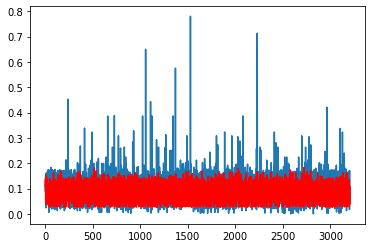


Mean Absolute Error :: 
 0.033058258797641314

Mean Squared Error :: 
 0.0023384455242229664

Root Mean Square Error :: 
 0.048357476404615726

Accuracy :: 
 36.65938443411345 %


In [25]:
# Dependent Variables

X = dataset[['Name', 'From', 'To', 'Stops', 'Extra Services', 'Duration']].values

# Independent Variable

Y = dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['Without Encoded Route'] = accuracy*100

## <u>Eliminating <i>'Extra Services'</i></u>

   Original  Predicted
0  0.109359   0.145116
1  0.109359   0.137036
2  0.088112   0.111947
3  0.116844   0.140563
4  0.044616   0.050778


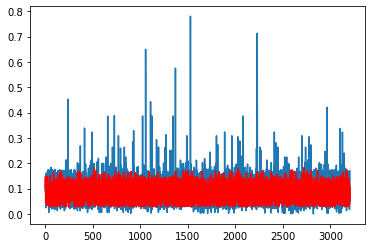


Mean Absolute Error :: 
 0.03331321691664669

Mean Squared Error :: 
 0.0023350177294270335

Root Mean Square Error :: 
 0.04832202116454809

Accuracy :: 
 36.7522318535461 %


In [26]:
# Dependent Variables

X = dataset[['Name', 'From', 'To', 'Stops', 'Encoded Route', 'Duration']].values

# Independent Variable

Y = dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['Without Extra Services'] = accuracy*100

## <u>Eliminating <i>'Stops'</i></u>

   Original  Predicted
0  0.109359   0.155957
1  0.109359   0.140252
2  0.088112   0.096930
3  0.116844   0.144921
4  0.044616   0.065117


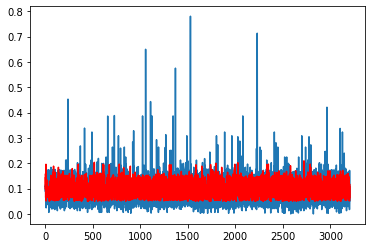


Mean Absolute Error :: 
 0.03653092329792393

Mean Squared Error :: 
 0.002779006821611882

Root Mean Square Error :: 
 0.05271628611360897

Accuracy :: 
 24.726062283967522 %


In [27]:
# Dependent Variables

X = dataset[['Name', 'From', 'To', 'Extra Services', 'Encoded Route', 'Duration']].values

# Independent Variable

Y = dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['Without Stops'] = accuracy*100

## <u>Eliminating <i>'To'</i></u>

   Original  Predicted
0  0.109359   0.137448
1  0.109359   0.129275
2  0.088112   0.118719
3  0.116844   0.136557
4  0.044616   0.057292


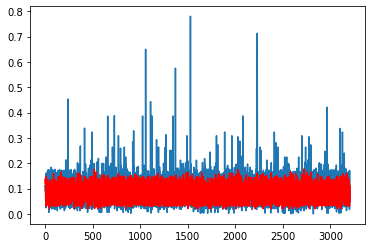


Mean Absolute Error :: 
 0.0330606819648998

Mean Squared Error :: 
 0.0023553531608140046

Root Mean Square Error :: 
 0.04853198080455819

Accuracy :: 
 36.20141348788132 %


In [28]:
# Dependent Variables

X = dataset[['Name', 'From', 'Stops', 'Extra Services', 'Encoded Route', 'Duration']].values

# Independent Variable

Y = dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['Without To'] = accuracy*100

## <u>Eliminating <i>'From'</i></u>

   Original  Predicted
0  0.109359   0.137263
1  0.109359   0.128889
2  0.088112   0.117001
3  0.116844   0.135534
4  0.044616   0.047806


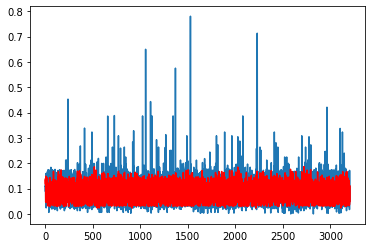


Mean Absolute Error :: 
 0.03310813273782061

Mean Squared Error :: 
 0.002335312943516761

Root Mean Square Error :: 
 0.04832507572179024

Accuracy :: 
 36.744235497858796 %


In [29]:
# Dependent Variables

X = dataset[['Name', 'To', 'Stops', 'Extra Services', 'Encoded Route', 'Duration']].values

# Independent Variable

Y = dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['Without From'] = accuracy*100

## <u>Eliminating <i>'Name'</i></u>

   Original  Predicted
0  0.109359   0.137857
1  0.109359   0.129621
2  0.088112   0.112841
3  0.116844   0.133904
4  0.044616   0.053106


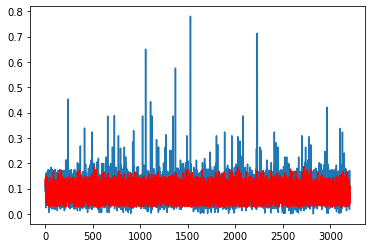


Mean Absolute Error :: 
 0.033112040816998846

Mean Squared Error :: 
 0.002336160730021054

Root Mean Square Error :: 
 0.048333846629676123

Accuracy :: 
 36.72127181600514 %


In [30]:
# Dependent Variables

X = dataset[['From', 'To', 'Stops', 'Extra Services', 'Encoded Route', 'Duration']].values

# Independent Variable

Y = dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['Without Name'] = accuracy*100

## <u>Eliminating <i>'Features having Low correlation with Price'</i></u>

   Original  Predicted
0  0.109359   0.142150
1  0.109359   0.134410
2  0.088112   0.118226
3  0.116844   0.148073
4  0.044616   0.051087


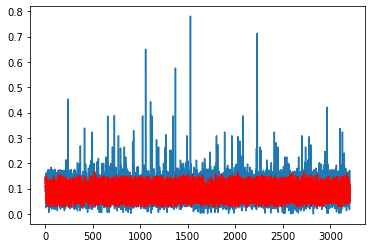


Mean Absolute Error :: 
 0.03318741486834734

Mean Squared Error :: 
 0.002386599451451852

Root Mean Square Error :: 
 0.048852834630672685

Accuracy :: 
 35.35505668262305 %


In [31]:
# Dependent Variables

X = dataset[['Stops', 'Encoded Route', 'Duration']].values

# Independent Variable

Y = dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['Without features with low correlation'] = accuracy*100

## <u>Eliminating <i>'Features having negative correlation with Price'</i></u>

   Original  Predicted
0  0.109359   0.144282
1  0.109359   0.136463
2  0.088112   0.112946
3  0.116844   0.142661
4  0.044616   0.057374


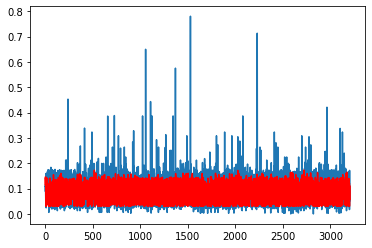


Mean Absolute Error :: 
 0.03317946354092011

Mean Squared Error :: 
 0.0023602616214887977

Root Mean Square Error :: 
 0.04858252382790336

Accuracy :: 
 36.06845981528052 %


In [32]:
# Dependent Variables

X = dataset[['From', 'Stops', 'Encoded Route', 'Duration']].values

# Independent Variable

Y = dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['Without features with negative correlation'] = accuracy*100

### Accuracy of Model and Features

In [33]:
# condition = list(accuracy_dict.keys())
# value = list(accuracy_dict.values())

# accuracy_dict = {'Accuracy':condition, 'Value':value}

In [60]:
# accuracy_df= pd.DataFrame(accuracy_dict)
accuracy_df

,Accuracy,Value
0,With all features,36.832834
1,Without Duration,32.140272
2,Without Encoded Route,36.659384
3,Without Extra Services,36.752232
4,Without Stops,24.726062
5,Without To,36.201413
6,Without From,36.744235
7,Without Name,36.721272
8,Without features with low correlation,35.355057
9,Without features with negative correlation,36.068460


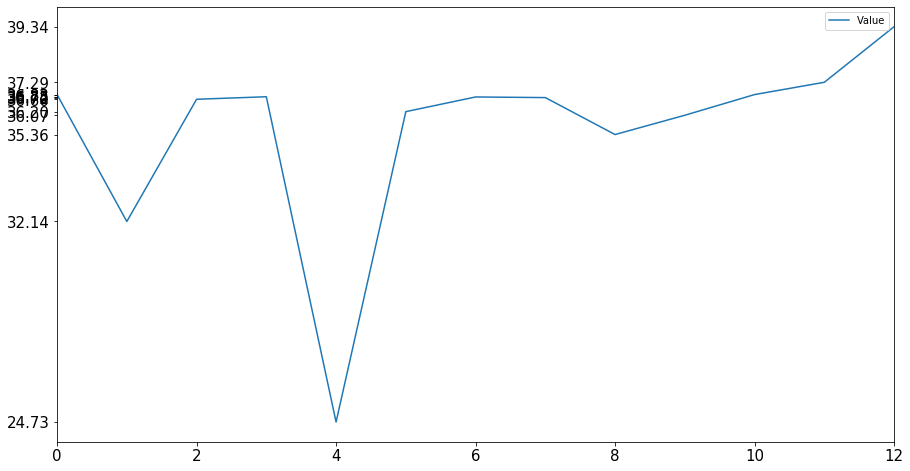

In [61]:
accuracy_df.plot(fontsize=15, figsize=(15,8), yticks=value)

### Model with Actual Dataset

In [36]:
actual_dataset.head()

,Date,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route,Duration
0,2019-03-01,1,0,5,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,1,8,17135,3,2345
1,2019-03-01,10,0,5,BLR → DEL,07:00,09:40,2h 40m,4,8,21520,18,160
2,2019-03-01,4,0,5,BLR → BOM → DEL,08:55,16:10,7h 15m,0,8,26890,5,435
3,2019-03-01,1,0,5,BLR → BOM → DEL,06:45,12:15,5h 30m,0,8,23677,5,330
4,2019-03-01,3,0,5,BLR → DEL,22:20,01:10 02 Mar,2h 50m,4,8,11934,18,170


#### Model with Actual Dataset 

   Original     Predicted
0     10262  12491.971677
1     10262  11842.727565
2      8610  10751.498996
3     10844  12191.511866
4      5228   5783.581864


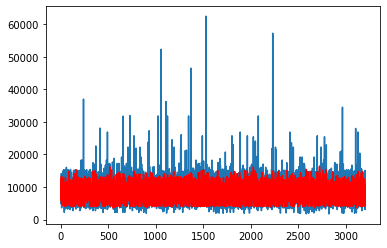


Mean Absolute Error :: 
 2578.674858804432

Mean Squared Error :: 
 14098427.744683543

Root Mean Square Error :: 
 3754.787310179305

Accuracy :: 
 36.83283352220775 %


In [37]:
# Dependent Variables

X = actual_dataset[['Name', 'From', 'To', 'Stops', 'Extra Services', 'Encoded Route', 'Duration']].values

# Independent Variable

Y = actual_dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['With Actual Dataset'] = accuracy*100

In [38]:
actual_dataset.head()

,Date,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route,Duration
0,2019-03-01,1,0,5,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,1,8,17135,3,2345
1,2019-03-01,10,0,5,BLR → DEL,07:00,09:40,2h 40m,4,8,21520,18,160
2,2019-03-01,4,0,5,BLR → BOM → DEL,08:55,16:10,7h 15m,0,8,26890,5,435
3,2019-03-01,1,0,5,BLR → BOM → DEL,06:45,12:15,5h 30m,0,8,23677,5,330
4,2019-03-01,3,0,5,BLR → DEL,22:20,01:10 02 Mar,2h 50m,4,8,11934,18,170


In [39]:
actual_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 13 columns):
Date              10682 non-null datetime64[ns]
Name              10682 non-null int64
From              10682 non-null int64
To                10682 non-null int64
Route             10682 non-null object
Departure         10682 non-null object
Arrival           10682 non-null object
Time of Flight    10682 non-null object
Stops             10682 non-null int64
Extra Services    10682 non-null int64
Price             10682 non-null int64
Encoded Route     10682 non-null int64
Duration          10682 non-null int64
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 1.1+ MB


#### Splitting Date To Day, Month & Year

In [40]:
# Converting datetime64 to object

actual_dataset['Date'] = actual_dataset['Date'].astype('str')

In [62]:
# actuaactual_dataset Information 

actual_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 15 columns):
Date              10682 non-null object
Name              10682 non-null int64
From              10682 non-null int64
To                10682 non-null int64
Route             10682 non-null object
Departure         10682 non-null object
Arrival           10682 non-null object
Time of Flight    10682 non-null object
Stops             10682 non-null int64
Extra Services    10682 non-null int64
Price             10682 non-null int64
Encoded Route     10682 non-null int64
Duration          10682 non-null int64
Month             10682 non-null float64
Day               10682 non-null float64
dtypes: float64(2), int64(8), object(5)
memory usage: 1.2+ MB


#### Adding Year, Month & Day Column

In [42]:
# filling Year, Month & Day Column

actual_dataset['Year'] = actual_dataset['Date'].str.split('-').str[0]
actual_dataset['Month'] = actual_dataset['Date'].str.split('-').str[1]
actual_dataset['Day'] = actual_dataset['Date'].str.split('-').str[2]

In [43]:
# actual_dataset after adding Day, Month & Year

actual_dataset.head()

,Date,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route,Duration,Year,Month,Day
0,2019-03-01,1,0,5,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,1,8,17135,3,2345,2019,03,01
1,2019-03-01,10,0,5,BLR → DEL,07:00,09:40,2h 40m,4,8,21520,18,160,2019,03,01
2,2019-03-01,4,0,5,BLR → BOM → DEL,08:55,16:10,7h 15m,0,8,26890,5,435,2019,03,01
3,2019-03-01,1,0,5,BLR → BOM → DEL,06:45,12:15,5h 30m,0,8,23677,5,330,2019,03,01
4,2019-03-01,3,0,5,BLR → DEL,22:20,01:10 02 Mar,2h 50m,4,8,11934,18,170,2019,03,01


In [44]:
# actual_dataset information

actual_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 16 columns):
Date              10682 non-null object
Name              10682 non-null int64
From              10682 non-null int64
To                10682 non-null int64
Route             10682 non-null object
Departure         10682 non-null object
Arrival           10682 non-null object
Time of Flight    10682 non-null object
Stops             10682 non-null int64
Extra Services    10682 non-null int64
Price             10682 non-null int64
Encoded Route     10682 non-null int64
Duration          10682 non-null int64
Year              10682 non-null object
Month             10682 non-null object
Day               10682 non-null object
dtypes: int64(8), object(8)
memory usage: 1.3+ MB


In [45]:
# Converting Day, Month & Year from object to int64

actual_dataset['Day'] = actual_dataset['Day'].astype('int64')
actual_dataset['Month'] = actual_dataset['Month'].astype('int64')
actual_dataset['Year'] = actual_dataset['Year'].astype('int64')

In [46]:
# actual_dataset information

actual_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 16 columns):
Date              10682 non-null object
Name              10682 non-null int64
From              10682 non-null int64
To                10682 non-null int64
Route             10682 non-null object
Departure         10682 non-null object
Arrival           10682 non-null object
Time of Flight    10682 non-null object
Stops             10682 non-null int64
Extra Services    10682 non-null int64
Price             10682 non-null int64
Encoded Route     10682 non-null int64
Duration          10682 non-null int64
Year              10682 non-null int64
Month             10682 non-null int64
Day               10682 non-null int64
dtypes: int64(11), object(5)
memory usage: 1.3+ MB


### Correletion

In [47]:
corr = actual_dataset.corr()
corr

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Year,Month,Day
Name,1.000000,-0.013397,0.018446,0.035973,-0.060748,-0.039565,0.025214,-0.159651,NaN,0.024674,0.026137
From,-0.013397,1.000000,-0.592576,-0.225605,-0.022109,0.015999,0.403412,0.161886,NaN,0.183268,0.004902
To,0.018446,-0.592576,1.000000,0.337872,0.026821,-0.071122,-0.461176,-0.257352,NaN,-0.364682,-0.041025
Stops,0.035973,-0.225605,0.337872,1.000000,0.164054,-0.571221,-0.437749,-0.602282,NaN,-0.026328,0.029225
Extra Services,-0.060748,-0.022109,0.026821,0.164054,1.000000,-0.065463,0.035152,-0.167870,NaN,-0.051491,-0.016296
Price,-0.039565,0.015999,-0.071122,-0.571221,-0.065463,1.000000,0.164149,0.506480,NaN,-0.103643,-0.153774
Encoded Route,0.025214,0.403412,-0.461176,-0.437749,0.035152,0.164149,1.000000,0.288773,NaN,0.244186,0.081632
Duration,-0.159651,0.161886,-0.257352,-0.602282,-0.167870,0.506480,0.288773,1.000000,NaN,0.014836,-0.022439
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.024674,0.183268,-0.364682,-0.026328,-0.051491,-0.103643,0.244186,0.014836,NaN,1.000000,-0.038359


#### Model added with Month Feature

   Original     Predicted
0     10262  12235.682613
1     10262  11593.080394
2      8610  10724.789703
3     10844  12179.409517
4      5228   5687.212799


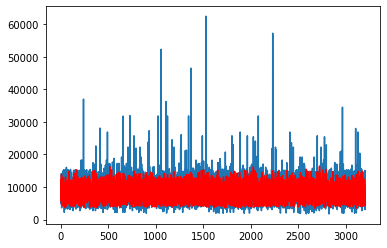


Mean Absolute Error :: 
 2576.8016574353896

Mean Squared Error :: 
 13996962.678868752

Root Mean Square Error :: 
 3741.2514856487196

Accuracy :: 
 37.2874417111542 %


In [48]:
# Dependent Variables

X = actual_dataset[['Name', 'From', 'To', 'Stops', 'Extra Services', 'Encoded Route', 'Duration', 'Month']].values

# Independent Variable

Y = actual_dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['With Month'] = accuracy*100

#### Model added with Month & Day Features

   Original     Predicted
0     10262  12934.651837
1     10262  12300.443190
2      8610  11175.415699
3     10844  11843.494909
4      5228   6146.252850


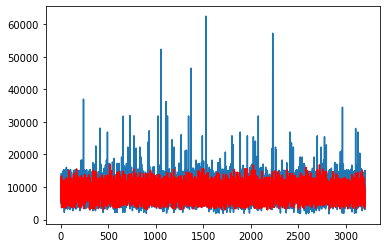


Mean Absolute Error :: 
 2546.5567072254435

Mean Squared Error :: 
 13538248.27847131

Root Mean Square Error :: 
 3679.435864160607

Accuracy :: 
 39.342684282907825 %


In [49]:
# Dependent Variables

X = actual_dataset[['Name', 'From', 'To', 'Stops', 'Extra Services', 'Encoded Route', 'Duration', 'Month', 'Day']].values

# Independent Variable

Y = actual_dataset['Price'].values

# Splitting Dataset into Test and Train Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Fitting Data into Model

lm = LinearRegression()  
lm.fit(X_train, Y_train)

# Model Prediction

Y_predicted = lm.predict(X_test)

test_dataframe = pd.DataFrame({'Original': Y_test, 'Predicted': Y_predicted})
print(test_dataframe.head())

plt.plot(Y_test)
plt.plot(Y_predicted, color='red')
plt.show()

# Model Errors

# Mean Absolute Error

print('\nMean Absolute Error :: \n',metrics.mean_absolute_error(Y_test, Y_predicted))

# Mean Sqaured Error

print('\nMean Squared Error :: \n',metrics.mean_squared_error(Y_test, Y_predicted))

# Root Mean Squared Error

print('\nRoot Mean Square Error :: \n',np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

#### Accuracy of Model

accuracy = lm.score(X_test,Y_test)
print('\nAccuracy :: \n',accuracy*100,'%')

accuracy_dict['With Month and Day'] = accuracy*100

### Correlation

In [59]:
corr = actual_dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
Name,1,-0.013397,0.0184457,0.0359727,-0.0607477,-0.0395648,0.0252143,-0.159651,0.0246742,0.0261368
From,-0.013397,1,-0.592576,-0.225605,-0.0221088,0.0159992,0.403412,0.161886,0.183268,0.00490164
To,0.0184457,-0.592576,1,0.337872,0.0268207,-0.0711225,-0.461176,-0.257352,-0.364682,-0.0410245
Stops,0.0359727,-0.225605,0.337872,1,0.164054,-0.571221,-0.437749,-0.602282,-0.0263284,0.0292249
Extra Services,-0.0607477,-0.0221088,0.0268207,0.164054,1,-0.0654625,0.0351522,-0.16787,-0.0514907,-0.0162961
Price,-0.0395648,0.0159992,-0.0711225,-0.571221,-0.0654625,1,0.164149,0.50648,-0.103643,-0.153774
Encoded Route,0.0252143,0.403412,-0.461176,-0.437749,0.0351522,0.164149,1,0.288773,0.244186,0.0816317
Duration,-0.159651,0.161886,-0.257352,-0.602282,-0.16787,0.50648,0.288773,1,0.014836,-0.0224387
Month,0.0246742,0.183268,-0.364682,-0.0263284,-0.0514907,-0.103643,0.244186,0.014836,1,-0.0383586
Day,0.0261368,0.00490164,-0.0410245,0.0292249,-0.0162961,-0.153774,0.0816317,-0.0224387,-0.0383586,1


In [52]:
# Since Year Doesn't have any impact 
# I am going to drop year column

actual_dataset.drop(columns=['Year'], inplace=True)
actual_dataset.head()

,Date,Name,From,To,Route,Departure,Arrival,Time of Flight,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
0,2019-03-01,1,0,5,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,1,8,17135,3,2345,3.0,1.0
1,2019-03-01,10,0,5,BLR → DEL,07:00,09:40,2h 40m,4,8,21520,18,160,3.0,1.0
2,2019-03-01,4,0,5,BLR → BOM → DEL,08:55,16:10,7h 15m,0,8,26890,5,435,3.0,1.0
3,2019-03-01,1,0,5,BLR → BOM → DEL,06:45,12:15,5h 30m,0,8,23677,5,330,3.0,1.0
4,2019-03-01,3,0,5,BLR → DEL,22:20,01:10 02 Mar,2h 50m,4,8,11934,18,170,3.0,1.0


In [65]:
# dataset info

actual_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 15 columns):
Date              10682 non-null object
Name              10682 non-null int64
From              10682 non-null int64
To                10682 non-null int64
Route             10682 non-null object
Departure         10682 non-null object
Arrival           10682 non-null object
Time of Flight    10682 non-null object
Stops             10682 non-null int64
Extra Services    10682 non-null int64
Price             10682 non-null int64
Encoded Route     10682 non-null int64
Duration          10682 non-null int64
Month             10682 non-null float64
Day               10682 non-null float64
dtypes: float64(2), int64(8), object(5)
memory usage: 1.2+ MB


In [66]:
# dropping object values

actual_dataset.drop(columns=['Date', 'Route', 'Departure', 'Arrival', 'Time of Flight'], inplace=True)

In [67]:
actual_dataset.head()

,Name,From,To,Stops,Extra Services,Price,Encoded Route,Duration,Month,Day
0,1,0,5,1,8,17135,3,2345,3.0,1.0
1,10,0,5,4,8,21520,18,160,3.0,1.0
2,4,0,5,0,8,26890,5,435,3.0,1.0
3,1,0,5,0,8,23677,5,330,3.0,1.0
4,3,0,5,4,8,11934,18,170,3.0,1.0


## Writing Pre-Processed Dataset in xlsx

In [68]:
writer = pd.ExcelWriter("C:\\Users\\Ashutosh Kumar Singh\\PythonTraining\\flight raw\\Again_Preprocessed_Flight_data.xlsx")
actual_dataset.to_excel(writer,'Sheet1')
writer.save()

## Accuracy Table

In [54]:
# Converting dictionary to dataframe

condition = list(accuracy_dict.keys())
value = list(accuracy_dict.values())

accuracy_dict = {'Accuracy':condition, 'Value':value}

In [56]:
accuracy_df= pd.DataFrame(accuracy_dict)
accuracy_df

,Accuracy,Value
0,With all features,36.832834
1,Without Duration,32.140272
2,Without Encoded Route,36.659384
3,Without Extra Services,36.752232
4,Without Stops,24.726062
5,Without To,36.201413
6,Without From,36.744235
7,Without Name,36.721272
8,Without features with low correlation,35.355057
9,Without features with negative correlation,36.068460


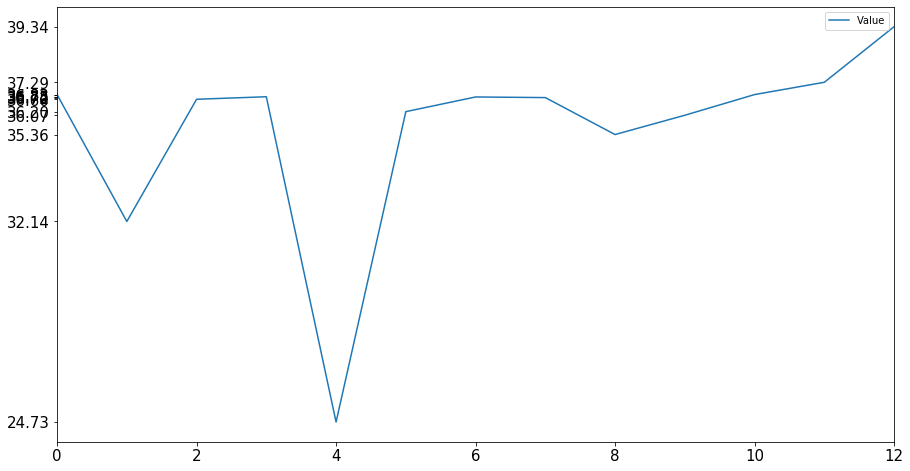

In [57]:
# Plotting dataframe

accuracy_df.plot(fontsize=15, figsize=(15,8), yticks=value)

In [58]:
# writing dataframe to xlsx

writer = pd.ExcelWriter("C:\\Users\\Ashutosh Kumar Singh\\PythonTraining\\flight raw\\Accuracy_table.xlsx")
accuracy_df.to_excel(writer,'Sheet1')
writer.save()